The data is a sample of 600 from a survey data from vine school data survey

To meet the targeted deliverables, here are the steps I took

Explanation:
1. Data Loading and Merging:
I load datasets including grades.csv (exam scores), attendance_data.csv (attendance records), extracurricular_activities.csv (participation in extracurriculars), and family_background.csv (socioeconomic factors).
The datasets are merged using a common identifiers.

2. Feature Engineering:
Attendance Rate: This is calculated as the percentage of days the student was present.
Extracurricular Involvement: A binary feature (1 for involvement, 0 for no involvement).
Family Involvement: Assumed as a binary feature that measures parental or family support.

3. Handling Missing Values:
I  used a SimpleImputer to handle missing data, using the most frequent value for categorical features and the median for numerical ones.

4. Target Variable:
The target variable is pass_fail, which is 1 if the student's last exam score is ≥50, and 0 otherwise.

5. Model Training and Evaluation:
I use a Random Forest Classifier, a robust model that handles both categorical and continuous data, is relatively easy to interpret, and avoids overfitting.
The dataset is split into training and test sets (80%-20% split) to evaluate model performance.

6. Model Evaluation:
I evaluate the model using the accuracy score, classification report (providing precision, recall, and F1 score), and confusion matrix (showing the correct and incorrect predictions for passing and failing students).

7. Feature Importance:
This section highlights which features had the biggest impact on predicting whether the student will pass or fail. This helps us understand what factors contribute the most (e.g., parental support, attendance, family involvement, extracurricular activities).


## PREDICTING STUDENT SUCCESS AND FAILURE USING MACHINE LEARNING

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



In [ ]:
#In order to import the data, we need to load it using pandas
#  Load the dataset into a Pandas DataFrame

In [ ]:
#Load datasets using the already loaded data's CSV file paths)
students_df = pd.read_csv('/content/Students Data.csv') #Student record
grades_df = pd.read_csv('/content/grades data.csv')  # Academic history and last exam scores
attendance_df = pd.read_csv('/content/Attendance_data.csv')  # Attendance data
extra_curricular_df = pd.read_csv('/content/student_activity_participation.csv')  # Extracurricular data
parent_data_df = pd.read_csv('/content/Parent Data.csv')  # Socioeconomic and family involvement data


In [ ]:
#Merge datasets on a unique identifier (student_id)
merged_df = grades_df.merge(attendance_df, on='student_id', how='left') \
                     .merge(extra_curricular_df, on='student_id', how='left') \
                     .merge(students_df, on = 'student_id', how='left') \
                     .merge(grades_df, on='student_id', how='left')




In [ ]:
merged_df1 = merged_df.merge(parent_data_df, on='parent_id', how='left')

In [ ]:
merged_df1

,grade_id_x,student_id,subject_id_x,first_test_x,second_test_x,exam_x,total_score_x,grade_x,academic_year_x,term_x,...,exam_y,total_score_y,grade_y,academic_year_y,term_y,first_name_y,last_name_y,occupation,education_level,income_bracket
0,2802,1005,2,14,15,6,35,E,2024,First Term,...,6,35,E,2024,First Term,Musa,Chukwu,Retired,Primary,Low
1,2802,1005,2,14,15,6,35,E,2024,First Term,...,69,96,A,2024,First Term,Musa,Chukwu,Retired,Primary,Low
2,2802,1005,2,14,15,6,35,E,2024,First Term,...,34,56,C,2024,First Term,Musa,Chukwu,Retired,Primary,Low
3,2802,1005,2,14,15,6,35,E,2024,First Term,...,6,35,E,2024,First Term,Musa,Chukwu,Retired,Primary,Low
4,2802,1005,2,14,15,6,35,E,2024,First Term,...,69,96,A,2024,First Term,Musa,Chukwu,Retired,Primary,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1244,1040,4,2,1,32,35,E,2024,First Term,...,32,35,E,2024,First Term,Kemi,Abimbola,Business,Primary,Medium
2201,1244,1040,4,2,1,32,35,E,2024,First Term,...,39,43,E,2024,First Term,Kemi,Abimbola,Business,Primary,Medium
2202,1244,1040,4,2,1,32,35,E,2024,First Term,...,32,35,E,2024,First Term,Kemi,Abimbola,Business,Primary,Medium
2203,1244,1040,4,2,1,32,35,E,2024,First Term,...,39,43,E,2024,First Term,Kemi,Abimbola,Business,Primary,Medium


In [ ]:
print(merged_df.columns)

print(parent_data_df.columns)
print(teachers_data_df.columns)

Index(['grade_id_x', 'student_id', 'subject_id_x', 'first_test_x',
       'second_test_x', 'exam_x', 'total_score_x', 'grade_x',
       'academic_year_x', 'term_x', 'attendance_id', 'date_x', 'status',
       'participation_id', 'activity_id', 'date_y', 'hours_spent',
       'special_occasion', 'first_name', 'last_name', 'parent_id', 'class_id',
       'gender', 'is_repeating', 'age', 'city', 'study_hours_per_week',
       'resource_access', 'computer_access', 'computer_literacy',
       'stress_level', 'exam_anxiety', 'internet_access', 'parental_support',
       'learning_environment', 'extracurricular_balance', 'teacher_engagement',
       'motivation_level', 'peer_influence', 'study_group_participation',
       'grade_id_y', 'subject_id_y', 'first_test_y', 'second_test_y', 'exam_y',
       'total_score_y', 'grade_y', 'academic_year_y', 'term_y'],
      dtype='object')
Index(['parent_id', 'first_name', 'last_name', 'occupation', 'education_level',
       'income_bracket'],
      dty

In [ ]:
merged_df1.drop(['grade_id_x', 'student_id', 'subject_id_x','attendance_id', 'date_x','participation_id',
                 'activity_id', 'date_y','parent_id', 'class_id','grade_id_y', 'subject_id_y' ], axis=1, inplace=True)

In [ ]:
merged_df1.shape

(2205, 42)

array([[<Axes: title={'center': 'first_test_x'}>,
        <Axes: title={'center': 'second_test_x'}>,
        <Axes: title={'center': 'exam_x'}>,
        <Axes: title={'center': 'total_score_x'}>],
       [<Axes: title={'center': 'academic_year_x'}>,
        <Axes: title={'center': 'hours_spent'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours_per_week'}>],
       [<Axes: title={'center': 'first_test_y'}>,
        <Axes: title={'center': 'second_test_y'}>,
        <Axes: title={'center': 'exam_y'}>,
        <Axes: title={'center': 'total_score_y'}>],
       [<Axes: title={'center': 'academic_year_y'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

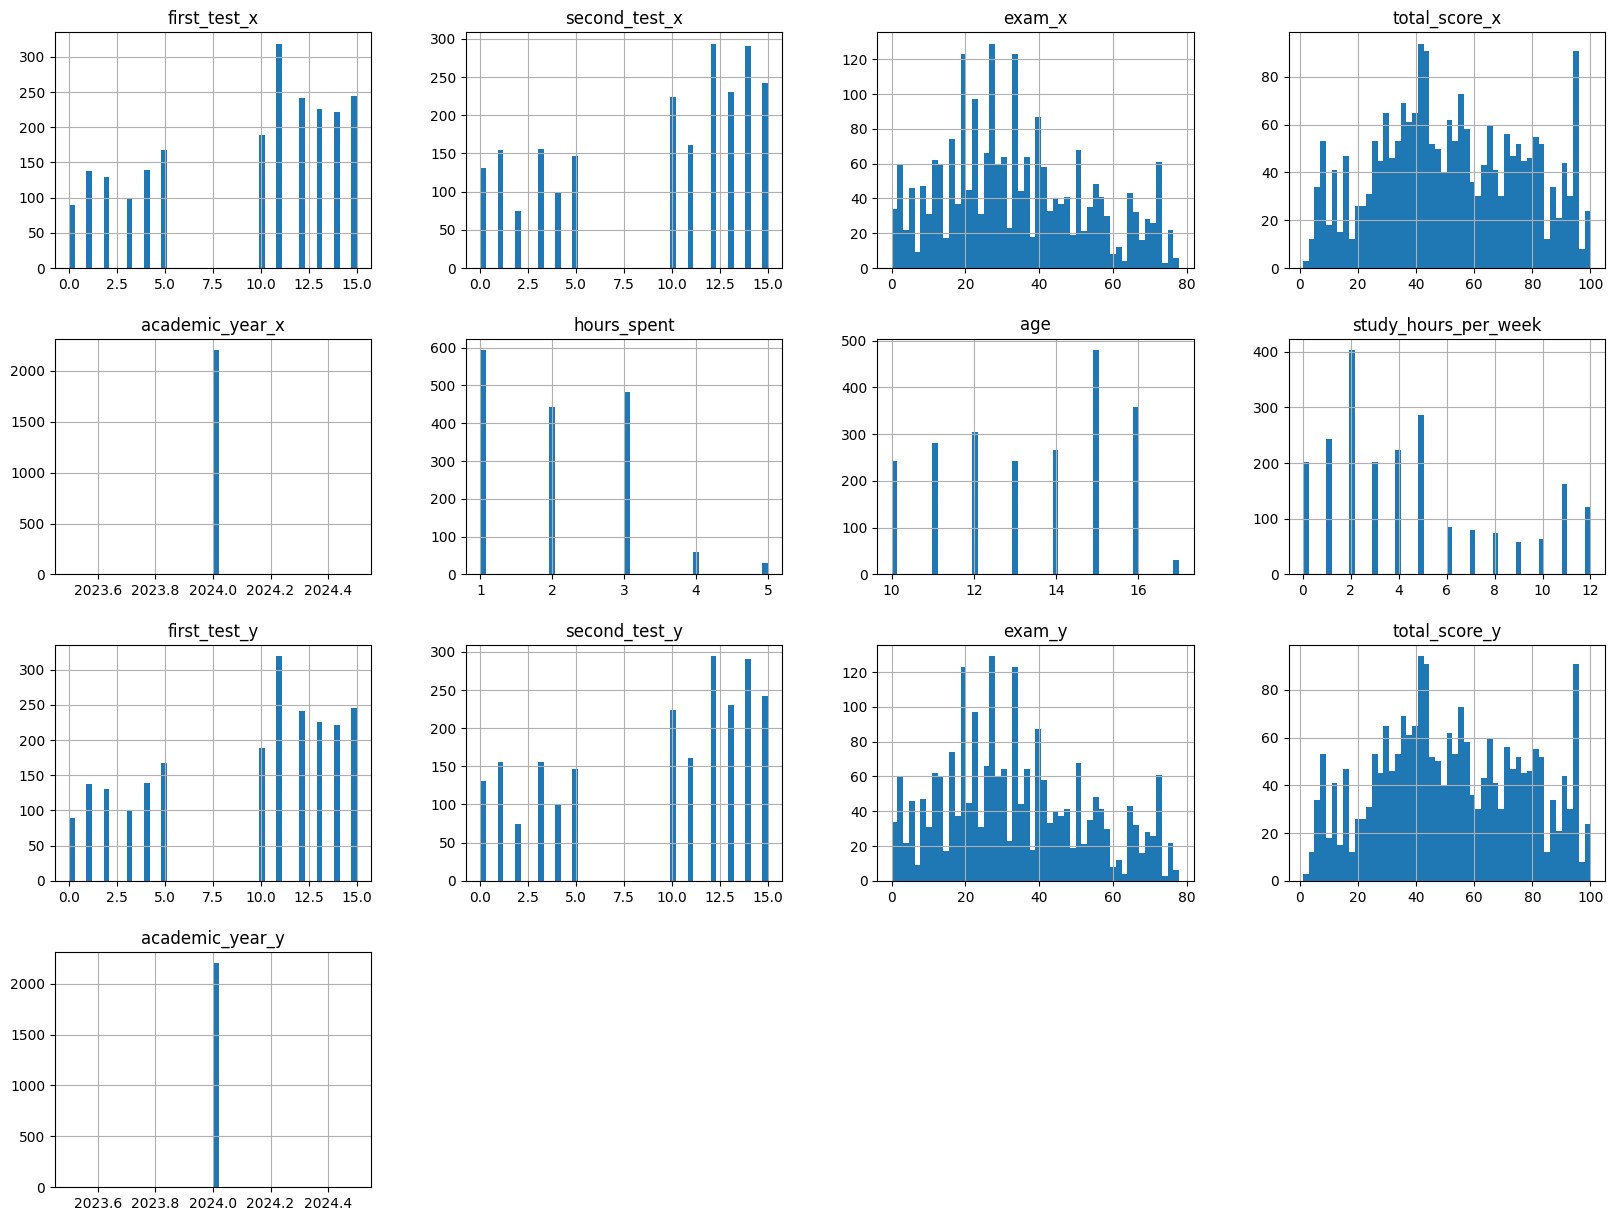

In [ ]:
#Visualisation of numerical variables in our data for evaluation
merged_df1.hist(bins=50, figsize=(20,15))

Having done the visualisation of the visual data, we move on to visualise the categorical data in our data

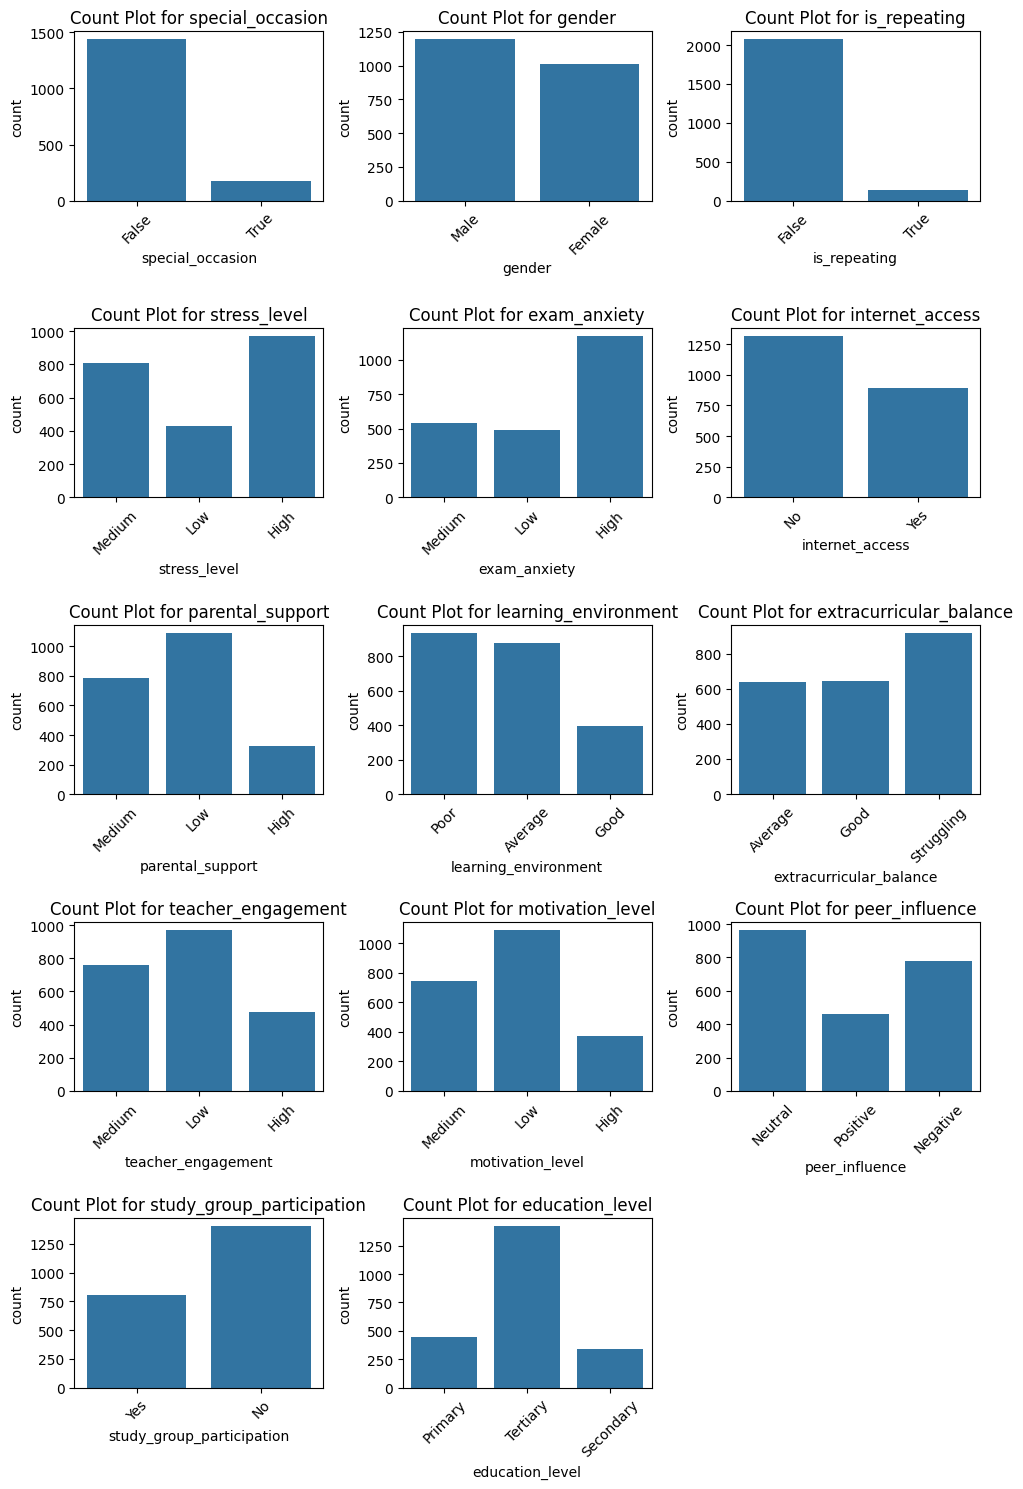

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to plot
categorical_columns = ['special_occasion', 'gender', 'is_repeating', 'stress_level', 'exam_anxiety',
                       'internet_access', 'parental_support', 'learning_environment',
                       'extracurricular_balance', 'teacher_engagement', 'motivation_level',
                       'peer_influence', 'study_group_participation', 'education_level',]

# Set the size of the overall plot canvas
plt.figure(figsize=(10, 15))

# Loop through each categorical column and create a subplot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size (5 rows, 3 columns)
    sns.countplot(x=column, data=merged_df1)
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

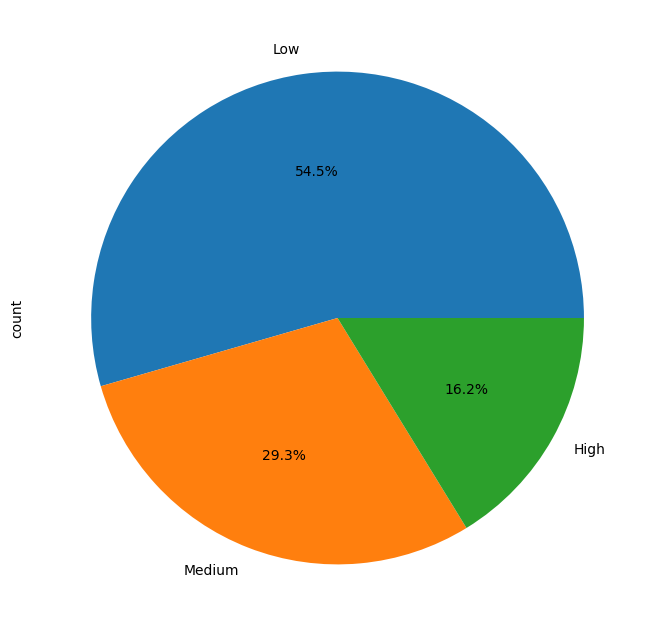

In [ ]:
# Pie chart for income_bracket showing that there are more low and medium income earners in the school than the high income earners
merged_df1['income_bracket'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))


In [ ]:
#This is to re-check if there are still any Null value that may affect our analysis
merged_df1.isna().sum()

,0
first_test_x,0
second_test_x,0
exam_x,0
total_score_x,0
grade_x,0
academic_year_x,0
term_x,0
status,541
hours_spent,595
special_occasion,595


To remove the NaN value above and improve our accuracy in prediction, we drop the rows with NaN values

In [ ]:
# Mappping 'Present' and 'Absent' to 1 and 0, and ignore NaN
merged_df1['attendance_numeric'] = merged_df1['status'].map({'Present': 1, 'Absent': 0})

# Dropping rows where 'attendance_numeric' is NaN
cleaned_df = merged_df1.dropna(subset=['attendance_numeric'])

# Calculate attendance rate as a percentage
attendance_rate = cleaned_df['attendance_numeric'].mean() * 100

#This shows the attendance rate based on the variability in income level
print("Attendance Rate: {:.2f}%".format(attendance_rate))


Attendance Rate: 74.82%


In [ ]:
# Moving onto other variables. we create a binary column like (1 for Yes, 0 for No)
merged_df1['special_occasion', 'gender','resource_access','computer_access' 'is_repeating', 'stress_level', 'exam_anxiety',
                       'internet_access', 'parental_support', 'learning_environment',
                       'extracurricular_balance', 'teacher_engagement', 'motivation_level',
                       'peer_influence', 'study_group_participation', 'education_level'] = merged_df1['hours_spent'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# We then define the target variable (pass/fail based on the last term score)
# Let's assume 'last_exam_score' is available, with pass as >= 50
merged_df1['pass_fail'] = merged_df1['total_score_x'].apply(lambda x: 1 if x >= 50 else 0)



Having sorted our data. we can then start building our machine learning model

In [ ]:
# Prepare features (X) and target (y)
# Selecting key factors affecting exam outcome (excluding previous exam records but including current exam)
X = merged_df1[['special_occasion', 'gender', 'is_repeating', 'stress_level', 'exam_anxiety',
                       'internet_access', 'parental_support', 'learning_environment',
                       'extracurricular_balance', 'teacher_engagement', 'motivation_level',
                       'peer_influence', 'study_group_participation', 'education_level']]  # Add other factors as needed
y = merged_df1['pass_fail']



In [ ]:
# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train.columns)

Index(['special_occasion', 'gender', 'is_repeating', 'stress_level',
       'exam_anxiety', 'internet_access', 'parental_support',
       'learning_environment', 'extracurricular_balance', 'teacher_engagement',
       'motivation_level', 'peer_influence', 'study_group_participation',
       'education_level'],
      dtype='object')


In [ ]:
# Build the RandomForestClassifier model
# Convert 'status' column to numerical representation using one-hot encoding
from sklearn.ensemble import RandomForestClassifier
import pandas as pd # Make sure pandas is imported

# Get the actual categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create dummies only for the existing categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
# hours_spent is likely already numerical


# Now fit the model with the transformed data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Prepare features (X) and target (y)
# List all columns that need to be one-hot encoded
columns_to_encode = ['special_occasion', 'gender', 'stress_level',
       'exam_anxiety', 'internet_access', 'parental_support',
       'learning_environment', 'extracurricular_balance', 'teacher_engagement',
       'motivation_level', 'peer_influence', 'study_group_participation',
       'education_level']  # 'gender' added to the list
#One-hot encode before splitting
X_encoded = pd.get_dummies(X, columns=columns_to_encode)


# Step 2: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Build the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = model.predict(X_test)

In [ ]:
# Step 9: Make predictions and evaluate

y_pred = model.predict(X_test)

In [ ]:
# Step 10: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6961451247165533
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       224
           1       0.67      0.76      0.71       217

    accuracy                           0.70       441
   macro avg       0.70      0.70      0.70       441
weighted avg       0.70      0.70      0.70       441

Confusion Matrix:
 [[143  81]
 [ 53 164]]


Precision = 0.73:

Precision for class 0 (fail) is 0.73, which means that when the model predicts a student will fail, 73% of those predictions are correct. For class 1 (pass), the precision is lower at 0.67, meaning that 67% of the time, the model is correct when predicting a student will pass.

Recall for class 0 is 0.64, meaning the model correctly identifies 64% of all actual "fail" cases. For class 1, the recall is higher at 0.76, meaning the model correctly identifies 76% of all actual "pass" cases.

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,  # Use X_encoded.columns instead of X.columns
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
                                Feature  Importance
26                motivation_level_Low    0.034262
18           learning_environment_Poor    0.034088
8                    exam_anxiety_High    0.033993
19     extracurricular_balance_Average    0.033316
1               special_occasion_False    0.033295
24           teacher_engagement_Medium    0.033272
4                          gender_Male    0.032797
27             motivation_level_Medium    0.032724
29              peer_influence_Neutral    0.032142
23              teacher_engagement_Low    0.031887
14                parental_support_Low    0.031315
11                  internet_access_No    0.030478
28             peer_influence_Negative    0.030402
16        learning_environment_Average    0.030380
3                        gender_Female    0.029577
22             teacher_engagement_High    0.028963
7                  stress_level_Medium    0.028886
20        extracurricular_balance_Good    0.028782
21  extrac

Explanation:



Motivation Level (Low, Medium): Motivation is a critical feature, with lower motivation levels contributing more heavily to the predictions.

Learning Environment (Poor, Average, Good): The quality of the learning environment also plays a significant role. Poor and average learning environments have a higher influence on the outcome compared to a good environment.

Stress Level (High, Medium, Low): Stress level is a moderately important predictor, with low and medium stress having more impact than high stress in this dataset.

Parental Support (Low, Medium): Parental support is another key factor, with lower levels of support being more indicative of failure.

Extracurricular Balance (Average, Good, Struggling): This feature measures a student's ability to balance extracurricular activities and studies. Those struggling with balance are more likely to fail, while those with a good balance tend to perform better.

Teacher Engagement (Medium, High, Low): Teacher engagement, as expected, influences student outcomes. A lack of teacher engagement (low) is more closely tied to poor performance.

Other factors: The other factors like peer influence, study group participation, and exam anxiety also contribute, but to a lesser extent.